In [1]:
import numpy as np

### Research question
Is d-separation valid for intrinsic SCMs? That is, cyclic SCMs satisfiying $\rho(|A|)<1$, where $A$ is the Lipschitz matrix of the structural functions $F$?

I need methods for:
- sampling (enumerating?) from all possible cyclic graphs $G$ of size n
- sampling SCMs which fit $G$ (ideally including a mix of intrinsic and not)
- determining if an SCM $M$ is intrinsic
- constructing the graph $G$, given $M$ (unnecessary?)
- finding all d-separation statements from a cyclic graph $G$
- sampling a dataset from the observational distribution $P(V)$ of $M$
- checking whether an independence holds in the dataset from $P(V)$

Relevant resources:
- Constraint-based Causal Discovery for Non-Linear Structural Causal Models with Cycles and Latent Confounders, Mooji et. al.
- PYCID

In [2]:
import numpy as np
import helper_functions as hf
from matplotlib import pyplot as plt
import time
import networkx as nx
from tqdm import tqdm
from itertools import combinations
import pickle

In [3]:
def aggregate_data(intrinsic_data, non_intrinsic_data, high_lipschitz_data):
    all_int_pvals, all_non_pvals, all_high_pvals = [], [], []

    for key, (Adj,Adj_d_seps) in intrinsic_data.items():

        (nAdj,nAdj_d_seps) = non_intrinsic_data[key]
        (hAdj,hAdj_d_seps) = high_lipschitz_data[key]
        assert np.allclose(Adj,nAdj)
        assert np.allclose(Adj,hAdj)

        for candidate, int_pvals in Adj_d_seps.items():
            non_pvals = nAdj_d_seps[candidate]
            high_pvals = hAdj_d_seps[candidate]
            all_int_pvals.extend(int_pvals)
            all_non_pvals.extend(non_pvals)
            all_high_pvals.extend(high_pvals)
    return all_int_pvals, all_non_pvals, all_high_pvals

In [4]:
intrinsic_data = pickle.load(open( "intrinsic_data.p", "rb" ) )
non_intrinsic_data = pickle.load(open( "non_intrinsic_data.p", "rb" ) )
high_lipschitz_data = pickle.load(open( "high_lipschitz_data.p", "rb" ) )

In [5]:
all_int_pvals, all_non_pvals, all_high_pvals = aggregate_data(intrinsic_data, non_intrinsic_data, high_lipschitz_data)

In [10]:
def plot_aggregate(int_pvals,non_pvals,high_pvals):
    plt.rcParams.update({'font.size': 22})
    plt.figure(figsize=(9, 3))
    plt.hist(int_pvals,label=r"$\rho(|A|)<1$",alpha=0.7,color='y',bins=30)
    plt.hist(non_pvals,label=r"$\rho(A)<1$",alpha=0.5,color='b',bins=30)
    plt.hist(high_pvals,label=r"$\rho(A)>1$",alpha=0.4,color='r',bins=30)
    plt.axis([0, 1, 0, 1200])
    plt.xlabel("P-value (fcit)")
    plt.ylabel("freq")
    plt.legend()
    plt.title("Aggregated Pvals: All G of n=4, 10 pvals per",fontsize=22)
#     plt.show()
    plt.savefig("aggregated_plot.png")

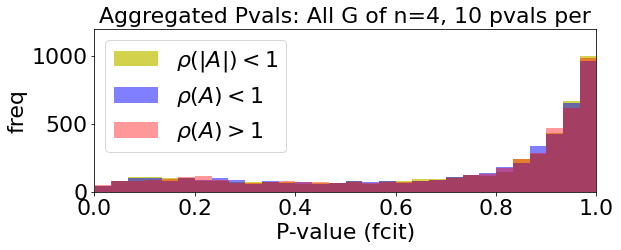

In [11]:
plot_aggregate(all_int_pvals, all_non_pvals, all_high_pvals)